### 2) VISUALISATION PERTINENTE

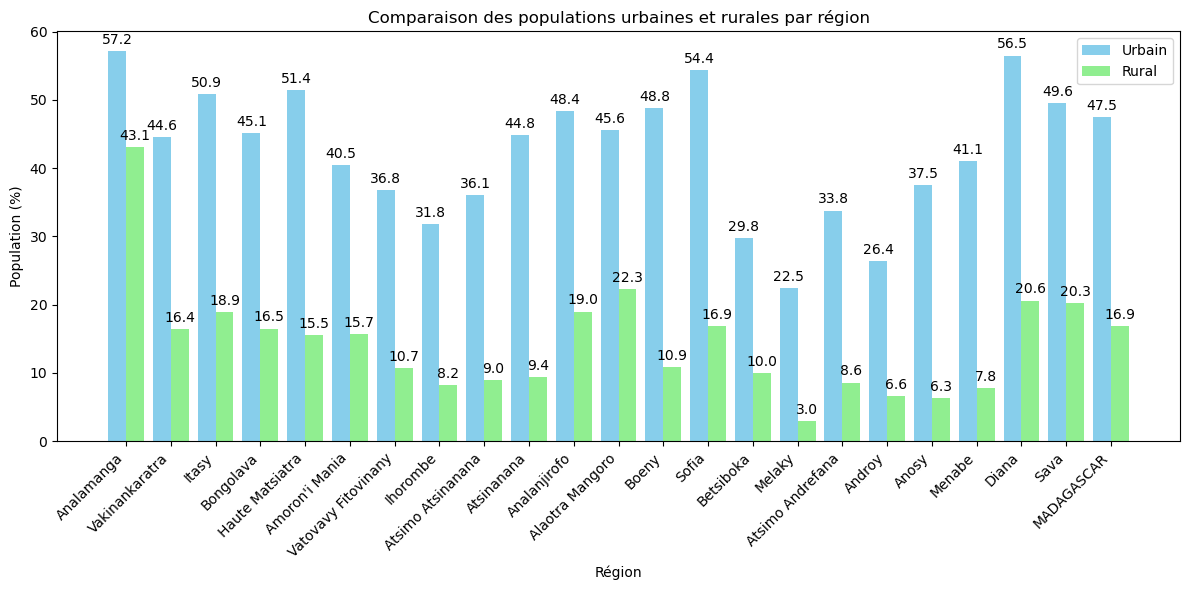

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importer le fichier CSV
file_path = 'madagascar_data.csv'  # Modifier selon le chemin exact
data = pd.read_csv(file_path)

# Extraire les colonnes nécessaires
regions = data['Région']
urbain_totals = data['Urbain Total']
rural_totals = data['Rural Total']

# Configuration du graphique
x = np.arange(len(regions))  # Positions des groupes
width = 0.4  # Largeur des barres

fig, ax = plt.subplots(figsize=(12, 6))

# Ajouter les barres urbaines et rurales
bar1 = ax.bar(x - width/2, urbain_totals, width, label='Urbain', color='skyblue')
bar2 = ax.bar(x + width/2, rural_totals, width, label='Rural', color='lightgreen')

# Ajouter les labels et le titre
ax.set_xlabel('Région')
ax.set_ylabel('Population (%)')
ax.set_title('Comparaison des populations urbaines et rurales par région')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend()

# Ajouter les valeurs sur les barres
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # décalage
                    textcoords="offset points",
                    ha='center', va='bottom')

# Ajuster le layout et afficher
plt.tight_layout()
plt.show()

### 3) Mise en cluster

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

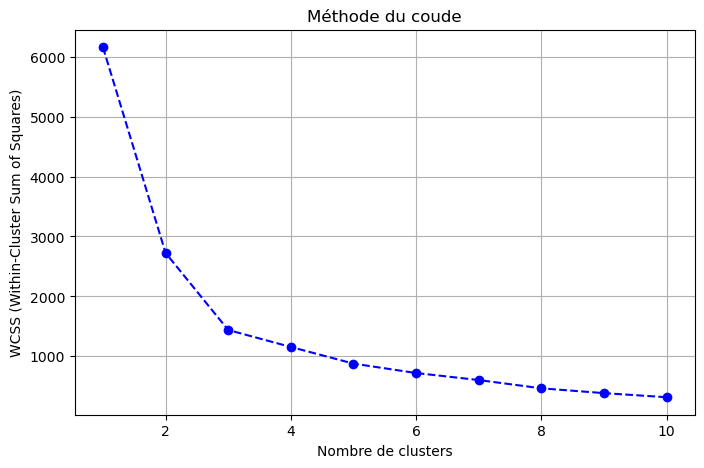

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


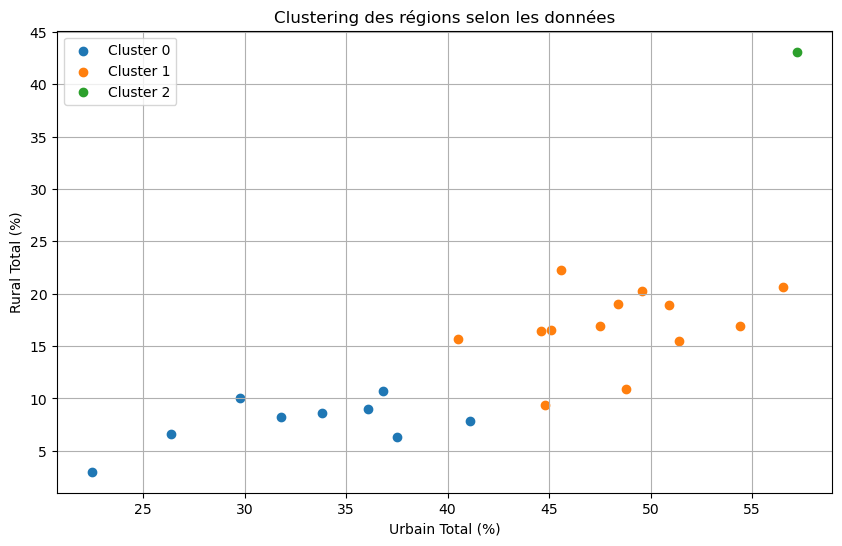

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Importer le fichier CSV
file_path = 'madagascar_data.csv'  # Modifier selon le chemin exact
data = pd.read_csv(file_path)

# Sélectionner les colonnes pour le clustering
features = data[['Urbain Total', 'Rural Total', 'Total', 'Plus pauvre', 'Plus riche']]

# Méthode du coude (Elbow Method) pour déterminer le nombre de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Visualiser la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

# Appliquer K-means avec le nombre optimal de clusters (par exemple, 3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Visualiser les clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Urbain Total'], cluster_data['Rural Total'], label=f'Cluster {cluster}')

plt.title('Clustering des régions selon les données')
plt.xlabel('Urbain Total (%)')
plt.ylabel('Rural Total (%)')
plt.legend()
plt.grid()
plt.show()